In [1]:
import QUANTAXIS as QA
try:
    assert QA.__version__>='1.1.0'
except AssertionError:
    print('pip install QUANTAXIS >= 1.1.0 请升级QUANTAXIS后再运行此示例')

QUANTAXIS>> start QUANTAXIS
QUANTAXIS>> Welcome to QUANTAXIS, the Version is 1.1.0
QUANTAXIS>>  
 ```````````````````````````````````````````````````````````````````````````````````````````````````````````````````````` 
  ``########`````##````````##``````````##`````````####````````##```##########````````#``````##``````###```##`````######`` 
  `##``````## ```##````````##`````````####````````##`##```````##```````##```````````###``````##````##`````##```##`````##` 
  ##````````##```##````````##````````##`##````````##``##``````##```````##``````````####```````#```##``````##```##``````## 
  ##````````##```##````````##```````##```##```````##```##`````##```````##`````````##`##```````##`##```````##````##``````` 
  ##````````##```##````````##``````##`````##``````##````##````##```````##````````##``###```````###````````##`````##`````` 
  ##````````##```##````````##``````##``````##`````##`````##```##```````##```````##````##```````###````````##``````###```` 
  ##````````##```##````````##`````##``````

In [2]:
print('首先确定你已经完成了对于QUANTAXIS的基础认知,以及在本地存储完毕了QUANTAXIS的数据库')

首先确定你已经完成了对于QUANTAXIS的基础认知,以及在本地存储完毕了QUANTAXIS的数据库


# QUANTAXIS 回测的一些基础知识

##  QA回测的核心是两个类

```
QA_BacktestBroker
QA_Account
```

##  回测数据的引入/迭代

```
QA.QA_fetch_stock_day_adv
QA.QA_fetch_stock_min_adv
```

##  指标的计算

```
DataStruct.add_func
```

##  对于账户的灵活运用

```
QA_Account
QA_Risk
QA_Portfolio
QA_PortfolioView
QA_User
```

## STEP1 初始化账户,初始化回测broker

In [3]:
Account=QA.QA_Account()
Broker=QA.QA_BacktestBroker()

In [4]:
import warnings

In [5]:
# 打印账户的信息
try:
    from pprint import  pprint as print
except:
    pass
print(Account.message)

{'account_cookie': 'Acc_5lOgHItd',
 'allow_sellopen': False,
 'allow_t0': False,
 'broker': 'backtest',
 'cash': [1000000],
 'commission_coeff': 0.00025,
 'current_time': 'None',
 'history': [],
 'init_assets': {'cash': 1000000, 'hold': {}},
 'margin_level': False,
 'market_type': 'stock_cn',
 'portfolio_cookie': None,
 'quantaxis_version': '1.1.0',
 'running_environment': 'backtest',
 'running_time': '2018-08-18 00:31:47.697624',
 'source': 'account',
 'strategy_name': None,
 'tax_coeff': 0.0015,
 'trade_index': [],
 'user_cookie': None}


## 首先讲解Account类:

QA_Account在初始化的时候,可以自己指定很多信息:

```

    QA_Account(
        strategy_name=None, user_cookie=None, portfolio_cookie=None, account_cookie=None,
        market_type=MARKET_TYPE.STOCK_CN, frequence=FREQUENCE.DAY, broker=BROKER_TYPE.BACKETEST,
        init_hold={}, init_cash=1000000, commission_coeff=0.00025, tax_coeff=0.0015,
        margin_level=False, allow_t0=False, allow_sellopen=False,
        running_environment=RUNNING_ENVIRONMENT.BACKETEST)

        :param [str] strategy_name:  策略名称
        :param [str] user_cookie:   用户cookie
        :param [str] portfolio_cookie: 组合cookie
        :param [str] account_cookie:   账户cookie

        :param [dict] init_hold         初始化时的股票资产
        :param [float] init_cash:         初始化资金
        :param [float] commission_coeff:  交易佣金 :默认 万2.5   float 类型
        :param [float] tax_coeff:         印花税   :默认 千1.5   float 类型

        :param [Bool] margin_level:      保证金比例 默认False
        :param [Bool] allow_t0:          是否允许t+0交易  默认False
        :param [Bool] allow_sellopen:    是否允许卖空开仓  默认False

        :param [QA.PARAM] market_type:   市场类别 默认QA.MARKET_TYPE.STOCK_CN A股股票
        :param [QA.PARAM] frequence:     账户级别 默认日线QA.FREQUENCE.DAY
        :param [QA.PARAM] broker:        BROEKR类 默认回测 QA.BROKER_TYPE.BACKTEST
        :param [QA.PARAM] running_environment 当前运行环境 默认Backtest

        # 2018/06/11 init_assets 从float变为dict,并且不作为输入,作为只读属性
        #  :param [float] init_assets:       初始资产  默认 1000000 元 （100万）
        init_assets:{
            cash: xxx,
            stock: {'000001':2000},
            init_date: '2018-02-05',
            init_datetime: '2018-02-05 15:00:00'
        }
        # 2018/06/11 取消在初始化的时候的cash和history输入
        # :param [list] cash:              可用现金  默认 是 初始资产  list 类型
        # :param [list] history:           交易历史
```

In [6]:
# 重设账户初始资金

Account.reset_assets(200000)
Account.account_cookie='JCSC_EXAMPLE'

In [7]:
Account.init_assets

{'cash': 200000, 'hold': {}}

Account 有很多方法,暂时不详细展开,我们先直接进入下一步

# SETP2:引入回测的市场数据

引入方法非常简单,直接使用QA_fetch_stock_day_adv系列即可

- code 可以是多种多样的选取方式

```python
1. QA.QA_fetch_stock_list_adv().code.tolist() # 获取全市场的股票代码
2. QA.QA_fetch_stock_block_adv().get_block('云计算').code  # 按版块选取
3. code= ['000001','000002'] # 自己指定
```
- 数据获取后,to_qfq() 即可获得前复权数据

```python
data=DataSturct.to_qfq()
```

In [8]:
# QA.QA_fetch_stock_list_adv().code.tolist()
# QA.QA_fetch_stock_block_adv().get_block('云计算').code
codelist=QA.QA_fetch_stock_block_adv().get_block('云计算').code

In [9]:
data=QA.QA_fetch_stock_day_adv(codelist,'2017-09-01','2018-05-20')

In [10]:
data

< QA_DataStruct_Stock_day with 109 securities >

In [11]:
data=data.to_qfq()

In [12]:
# data.data

## STEP3:计算一些指标

指标的计算可以在回测前,也可以在回测中进行

回测前的计算则是批量计算,效率较高

回测中的计算,效率略低,但代码量较小,易于理解

PS: 指标的相关介绍参见 [QUANTAXIS的指标系统](https://github.com/QUANTAXIS/QUANTAXIS/blob/master/Documents/indicators.md)

In [13]:
import numpy as np
import pandas as pd
def MACD_JCSC(dataframe,SHORT=12,LONG=26,M=9):
    """
    1.DIF向上突破DEA，买入信号参考。
    2.DIF向下跌破DEA，卖出信号参考。
    """
    CLOSE=dataframe.close
    DIFF =QA.EMA(CLOSE,SHORT) - QA.EMA(CLOSE,LONG)
    DEA = QA.EMA(DIFF,M)
    MACD =2*(DIFF-DEA)

    CROSS_JC=QA.CROSS(DIFF,DEA)
    CROSS_SC=QA.CROSS(DEA,DIFF)
    ZERO=0
    return pd.DataFrame({'DIFF':DIFF,'DEA':DEA,'MACD':MACD,'CROSS_JC':CROSS_JC,'CROSS_SC':CROSS_SC,'ZERO':ZERO})

In [14]:
ind=data.add_func(MACD_JCSC)

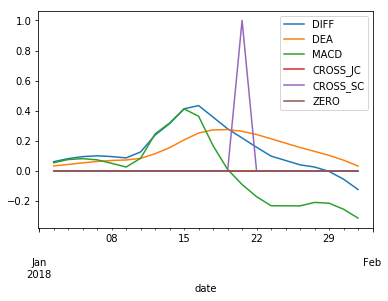

In [15]:
ind.xs(codelist[0],level=1)['2018-01'].plot()

In [16]:
ind.xs(codelist[0],level=1)['2018-01']

,DIFF,DEA,MACD,CROSS_JC,CROSS_SC,ZERO
date,,,,,,
2018-01-02,0.062832,0.034908,0.055848,0,0,0
2018-01-03,0.083081,0.044543,0.077076,0,0,0
2018-01-04,0.096405,0.054915,0.082979,0,0,0
2018-01-05,0.101761,0.064284,0.074953,0,0,0
2018-01-08,0.096831,0.070794,0.052074,0,0,0
2018-01-09,0.087880,0.074211,0.027338,0,0,0
2018-01-10,0.127678,0.084904,0.085548,0,0,0
2018-01-11,0.239488,0.115821,0.247333,0,0,0
2018-01-12,0.315590,0.155775,0.319631,0,0,0


In [17]:
ind.loc['2018-01',slice(None)]

DIFF       DEA      MACD  CROSS_JC  CROSS_SC  ZERO
date       code                                                          
2018-01-02 000021  0.062832  0.034908  0.055848         0         0     0
           000063  0.350531  0.539474 -0.377886         0         0     0
           000066 -0.103693 -0.164662  0.121938         0         0     0
           000070 -0.298122 -0.297769 -0.000706         0         0     0
           000100 -0.111283 -0.109635 -0.003296         0         0     0
           000555       NaN       NaN       NaN         0         0     0
           000611  0.085137  0.038461  0.093353         0         0     0
           000665 -0.128508 -0.179685  0.102356         0         0     0
           000836 -0.094147       NaN       NaN         0         0     0
           000938  1.251292  0.414957  1.672669         0         0     0
           000948 -0.138808 -0.163646  0.049677         0         0     0
           000977  0.147007  0.089165  0.115685         0         0     0
           002063 -0.000718 -0.041517  0.081599         0         0     0
           002065 -0.330897 -0.311772 -0.038251         0         0     0
           002093  0.071611  0.040341  0.062539         0         0     0
           002095 -0.141841 -0.246130  0.208579         0         0     0
           002195 -0.150915 -0.158826  0.015820         1         0     0
           002197 -0.039920 -0.026400 -0.027039         0         0     0
           002268 -0.282747 -0.095097 -0.375300         0         0     0
           002279 -0.207586 -0.179862 -0.055448         0         0     0
           002281  0.155791  0.417276 -0.522969         0         0     0
           002301 -0.029081  0.022214 -0.102589         0         0     0
           002315 -0.741722 -0.618039 -0.247365         0         0     0
           002335 -0.672783 -0.623881 -0.097803         0         0     0
           002368 -0.415162 -0.345593 -0.139139         0         0     0
           002396 -0.372709 -0.313333 -0.118752         0         0     0
           002415  0.137828  0.117979  0.039697         0         0     0
           002417 -0.315567 -0.213388 -0.204357         0         0     0
           002439 -0.110393  0.036686 -0.294157         0         0     0
           002456 -0.644033 -0.682755  0.077443         1         0     0
...                     ...       ...       ...       ...       ...   ...
2018-01-31 600225 -0.058853 -0.031449 -0.054807         0         0     0
           600289 -1.171529 -1.205996  0.068934         0         0     0
           600385 -0.338182 -0.307123 -0.062117         0         0     0
           600410 -0.088613 -0.075791 -0.025643         0         1     0
           600522 -0.557657 -0.468933 -0.177448         0         0     0
           600536 -0.648704 -0.408761 -0.479886         0         0     0
           600588  0.327150  0.199457  0.255386         0         0     0
           600589  0.004017  0.018157 -0.028280         0         1     0
           600590 -0.192047 -0.194900  0.005705         0         0     0
           600595 -0.069449 -0.013864 -0.111170         0         0     0
           600601 -0.071518 -0.047553 -0.047930         0         0     0
           600602 -0.020619  0.022803 -0.086844         0         0     0
           600633  0.138275  0.143204 -0.009859         0         1     0
           600718 -0.372869 -0.327002 -0.091732         0         0     0
           600728 -0.229074 -0.185714 -0.086721         0         0     0
           600756 -0.269601 -0.191433 -0.156336         0         0     0
           600767 -0.135812 -0.156087  0.040549         0         0     0
           600770 -0.135974 -0.112889 -0.046169         0         0     0
           600797 -0.134989 -0.070951 -0.128076         0         0     0
           600804 -0.353543 -0.371659  0.036233         0         0     0
           600845  0.292773  0.365709 -0.145873         0         0     0
           600850 -0.756647

# SETP4:选取回测的开始和结束日期,构建回测

In [18]:
data_forbacktest=data.select_time('2018-01-01','2018-05-01')


for items in data_forbacktest.panel_gen:
    for item in items.security_gen:
        daily_ind=ind.loc[item.index]
        if daily_ind.CROSS_JC.iloc[0]>0:
            order=Account.send_order(
                code=item.code[0], 
                time=item.date[0], 
                amount=1000, 
                towards=QA.ORDER_DIRECTION.BUY, 
                price=0, 
                order_model=QA.ORDER_MODEL.CLOSE, 
                amount_model=QA.AMOUNT_MODEL.BY_AMOUNT
                )
            #print(item.to_json()[0])
            Broker.receive_order(QA.QA_Event(order=order,market_data=item))
            
            
            trade_mes=Broker.query_orders(Account.account_cookie,'filled')
            res=trade_mes.loc[order.account_cookie,order.realorder_id]
            order.trade(res.trade_id,res.trade_price,res.trade_amount,res.trade_time)
        elif daily_ind.CROSS_SC.iloc[0]>0:
            if Account.sell_available.get(item.code[0], 0)>0:
                order=Account.send_order(
                    code=item.code[0], 
                    time=item.date[0], 
                    amount=Account.sell_available.get(item.code[0], 0), 
                    towards=QA.ORDER_DIRECTION.SELL, 
                    price=0, 
                    order_model=QA.ORDER_MODEL.MARKET, 
                    amount_model=QA.AMOUNT_MODEL.BY_AMOUNT
                    )
            Broker.receive_order(QA.QA_Event(order=order,market_data=item))
            
            
            trade_mes=Broker.query_orders(Account.account_cookie,'filled')
            res=trade_mes.loc[order.account_cookie,order.realorder_id]
            order.trade(res.trade_id,res.trade_price,res.trade_amount,res.trade_time)
    Account.settle()
            
        #break

['JCSC_EXAMPLE', '2018-01-02 00:00:00', '2018-01-02 00:00:00', '002195', None, 1, 5.91, 5.91, 'trade_success', 1000, 1000, 5915.0, 0, 'Order_XtyvER4u', 'Trade_o17SKt6D']
receive deal
['JCSC_EXAMPLE', '2018-01-02 00:00:00', '2018-01-02 00:00:00', '002456', None, 1, 20.78, 20.78, 'trade_success', 1000, 1000, 20785.195, 0, 'Order_BkIiUKgW', 'Trade_fpsi5C3g']
receive deal
['JCSC_EXAMPLE', '2018-01-02 00:00:00', '2018-01-02 00:00:00', '002544', None, 1, 15.85, 15.85, 'trade_success', 1000, 1000, 15855.0, 0, 'Order_TaDWKUFb', 'Trade_Jrh8uUq3']
receive deal
['JCSC_EXAMPLE', '2018-01-02 00:00:00', '2018-01-02 00:00:00', '300290', None, 1, 8.71, 8.71, 'trade_success', 1000, 1000, 8715.0, 0, 'Order_gteTblVX', 'Trade_Nh82IOwf']
receive deal
['JCSC_EXAMPLE', '2018-01-02 00:00:00', '2018-01-02 00:00:00', '300367', None, 1, 15.39, 15.39, 'trade_success', 1000, 1000, 15395.0, 0, 'Order_kpZCnvaB', 'Trade_vdIHricz']
receive deal
['JCSC_EXAMPLE', '2018-01-02 00:00:00', '2018-01-02 00:00:00', '600105', N

receive deal
['JCSC_EXAMPLE', '2018-01-09 00:00:00', '2018-01-09 00:00:00', '300367', None, -1, 52.22, 52.22, 'trade_success', 1000, 1000, 52311.385, 0, 'Order_y47AHEQF', 'Trade_W0cyvj3L']
receive deal
['JCSC_EXAMPLE', '2018-01-10 00:00:00', '2018-01-10 00:00:00', '002268', None, 1, 24.01, 24.01, 'trade_success', 1000, 1000, 24016.0025, 0, 'Order_ykePHDOa', 'Trade_qKbJGcBp']
receive deal
['JCSC_EXAMPLE', '2018-01-10 00:00:00', '2018-01-10 00:00:00', '002268', None, 1, 27.39, 27.39, 'trade_success', 1000, 1000, 27396.8475, 0, 'Order_ykePHDOa', 'Trade_fTCjX1lo']
receive deal
['JCSC_EXAMPLE', '2018-01-10 00:00:00', '2018-01-10 00:00:00', '300245', None, 1, 13.8, 13.8, 'trade_success', 1000, 1000, 13805.0, 0, 'Order_CVAirPux', 'Trade_SgkXaJL6']
receive deal
['JCSC_EXAMPLE', '2018-01-10 00:00:00', '2018-01-10 00:00:00', '300365', None, 1, 16.08, 16.0754385965, 'trade_success', 1000, 1000, 16080.4385965, 0, 'Order_Yt9L7eGD', 'Trade_9FIrhftK']
receive deal
['JCSC_EXAMPLE', '2018-01-10 00:00:0

receive deal
['JCSC_EXAMPLE', '2018-01-15 00:00:00', '2018-01-15 00:00:00', '300036', None, -1, 10.32, 10.325, 'trade_success', 1000, 1000, 10345.4875, 0, 'Order_WrNSZIMj', 'Trade_mOY8x5f9']
receive deal
['JCSC_EXAMPLE', '2018-01-15 00:00:00', '2018-01-15 00:00:00', '300036', None, -1, 18.06, 18.060000000000002, 'trade_success', 1000, 1000, 18092.090000000004, 0, 'Order_WrNSZIMj', 'Trade_LbYMh6Ki']
receive deal
['JCSC_EXAMPLE', '2018-01-15 00:00:00', '2018-01-15 00:00:00', '300036', None, -1, 14.29, 14.295, 'trade_success', 1000, 1000, 14321.4425, 0, 'Order_WrNSZIMj', 'Trade_RWElTUjn']
receive deal
['JCSC_EXAMPLE', '2018-01-15 00:00:00', '2018-01-15 00:00:00', '300245', None, -1, 13.38, 13.375, 'trade_success', 1000, 1000, 13400.0625, 0, 'Order_iT6qUeGK', 'Trade_7Jqoa6nY']
receive deal
['JCSC_EXAMPLE', '2018-01-15 00:00:00', '2018-01-15 00:00:00', '300245', None, -1, 15.43, 15.43, 'trade_success', 1000, 1000, 15458.145, 0, 'Order_iT6qUeGK', 'Trade_DoF052PN']
receive deal
['JCSC_EXAMPLE

['JCSC_EXAMPLE', '2018-01-19 00:00:00', '2018-01-22 00:00:00', '600804', None, 1, 7.0, 7.0, 'trade_success', 1000, 1000, 7005.0, 0, 'Order_XBl35Ipz', 'Trade_pTOkVoa2']
receive deal
['JCSC_EXAMPLE', '2018-01-19 00:00:00', '2018-01-22 00:00:00', '600804', None, 1, 11.75, 11.75, 'trade_success', 1000, 1000, 11755.0, 0, 'Order_XBl35Ipz', 'Trade_t7Azdkpa']
receive deal
['JCSC_EXAMPLE', '2018-01-22 00:00:00', '2018-01-22 00:00:00', '002095', None, 1, 38.61, 38.61, 'trade_success', 1000, 1000, 38619.6525, 0, 'Order_TsCl5cUM', 'Trade_WS6bdHxc']
receive deal
['JCSC_EXAMPLE', '2018-01-22 00:00:00', '2018-01-22 00:00:00', '300044', None, 1, 8.7, 8.6992327066, 'trade_success', 1000, 1000, 8704.2327066, 0, 'Order_8ZLVxvKO', 'Trade_WFZuiND2']
receive deal
['JCSC_EXAMPLE', '2018-01-22 00:00:00', '2018-01-22 00:00:00', '300128', None, 1, 10.18, 10.18, 'trade_success', 1000, 1000, 10185.0, 0, 'Order_mDvolKNO', 'Trade_gwciWrk9']
receive deal
['JCSC_EXAMPLE', '2018-01-22 00:00:00', '2018-01-22 00:00:00',

['JCSC_EXAMPLE', '2018-01-25 00:00:00', '2018-01-25 00:00:00', '600198', None, 1, 10.36, 10.36, 'trade_success', 1000, 1000, 10365.0, 0, 'Order_uKv2ejsJ', 'Trade_zlIFSuah']
receive deal
4187.9274999999925
NOT ENOUGH MONEY FOR Order_uKv2ejsJ
['JCSC_EXAMPLE', '2018-01-25 00:00:00', '2018-01-25 00:00:00', '600225', None, 1, 5.02, 5.02, 'trade_success', 1000, 1000, 5025.0, 0, 'Order_P0yIJ7Rn', 'Trade_1l6xqetr']
receive deal
4187.9274999999925
NOT ENOUGH MONEY FOR Order_P0yIJ7Rn
['JCSC_EXAMPLE', '2018-01-25 00:00:00', '2018-01-25 00:00:00', '600590', None, 1, 10.37, 10.37, 'trade_success', 1000, 1000, 10375.0, 0, 'Order_OoudNFCz', 'Trade_Nht1lUDZ']
receive deal
4187.9274999999925
NOT ENOUGH MONEY FOR Order_OoudNFCz
['JCSC_EXAMPLE', '2018-01-25 00:00:00', '2018-01-25 00:00:00', '600590', None, 1, 7.08, 7.08, 'trade_success', 1000, 1000, 7085.0, 0, 'Order_OoudNFCz', 'Trade_ftNJ3CYS']
receive deal
4187.9274999999925
NOT ENOUGH MONEY FOR Order_OoudNFCz
['JCSC_EXAMPLE', '2018-01-26 00:00:00', '2

['JCSC_EXAMPLE', '2018-01-31 00:00:00', '2018-01-31 00:00:00', '300052', None, -1, 11.18, 11.184999999999999, 'trade_success', 1000.0, 1000.0, 11206.777499999998, 0, 'Order_Xg5n78YT', 'Trade_vPKBucfy']
receive deal
['JCSC_EXAMPLE', '2018-01-31 00:00:00', '2018-01-31 00:00:00', '300052', None, -1, 6.92, 6.92, 'trade_success', 1000.0, 1000.0, 6935.38, 0, 'Order_Xg5n78YT', 'Trade_vdwU60ij']
receive deal
['JCSC_EXAMPLE', '2018-01-31 00:00:00', '2018-01-31 00:00:00', '600410', None, -1, 9.72, 9.725, 'trade_success', 1000.0, 1000.0, 9744.5875, 0, 'Order_TXjFWEDU', 'Trade_NgUH75Dk']
receive deal
['JCSC_EXAMPLE', '2018-01-31 00:00:00', '2018-01-31 00:00:00', '600410', None, -1, 6.06, 6.0649999999999995, 'trade_success', 1000.0, 1000.0, 6079.097499999999, 0, 'Order_TXjFWEDU', 'Trade_F7Jwx8C3']
receive deal
['JCSC_EXAMPLE', '2018-01-31 00:00:00', '2018-01-31 00:00:00', '600410', None, -1, 15.29, 15.29, 'trade_success', 1000.0, 1000.0, 15317.935, 0, 'Order_TXjFWEDU', 'Trade_IGJM5eSF']
receive dea

['JCSC_EXAMPLE', '2018-02-06 00:00:00', '2018-02-06 00:00:00', '002095', None, -1, 35.02, 35.01814596035, 'trade_success', 1000.0, 1000.0, 35079.42771578061, 0, 'Order_KyMvT8EN', 'Trade_Zx5nw9d2']
receive deal
['JCSC_EXAMPLE', '2018-02-07 00:00:00', '2018-02-07 00:00:00', '002837', None, 1, 19.02, 19.0234107738, 'trade_success', 1000, 1000, 19028.4107738, 0, 'Order_ihndJCga', 'Trade_PesxmlN7']
receive deal
['JCSC_EXAMPLE', '2018-02-07 00:00:00', '2018-02-07 00:00:00', '300271', None, -1, 15.22, 15.225, 'trade_success', 1000.0, 1000.0, 15252.8375, 0, 'Order_xmw90pUF', 'Trade_5XEohaAc']
receive deal
['JCSC_EXAMPLE', '2018-02-07 00:00:00', '2018-02-07 00:00:00', '600767', None, -1, 5.92, 5.915, 'trade_success', 3000.0, 3000.0, 17776.6175, 0, 'Order_uvnZoAFw', 'Trade_n8ILkHYM']
receive deal
['JCSC_EXAMPLE', '2018-02-08 00:00:00', '2018-02-08 00:00:00', '300431', None, 1, 25.19, 25.19, 'trade_success', 1000, 1000, 25196.2975, 0, 'Order_hes5EBP6', 'Trade_NF2KczHq']
receive deal
['JCSC_EXAMPL

['JCSC_EXAMPLE', '2018-02-23 00:00:00', '2018-02-23 00:00:00', '300302', None, 1, 8.81, 8.806676737, 'trade_success', 1000, 1000, 8811.676737, 0, 'Order_UiRHSywO', 'Trade_5sR1TP0Q']
receive deal
['JCSC_EXAMPLE', '2018-02-23 00:00:00', '2018-02-23 00:00:00', '600198', None, 1, 7.36, 7.36, 'trade_success', 1000, 1000, 7365.0, 0, 'Order_dvwtijK3', 'Trade_kFYNP6Je']
receive deal
['JCSC_EXAMPLE', '2018-02-23 00:00:00', '2018-02-23 00:00:00', '600536', None, 1, 12.23, 12.23, 'trade_success', 1000, 1000, 12235.0, 0, 'Order_QT2s61v7', 'Trade_xlaeINjW']
receive deal
['JCSC_EXAMPLE', '2018-02-23 00:00:00', '2018-02-23 00:00:00', '600590', None, 1, 8.95, 8.95, 'trade_success', 1000, 1000, 8955.0, 0, 'Order_3HkDQCgO', 'Trade_bSQhsXLB']
receive deal
['JCSC_EXAMPLE', '2018-02-23 00:00:00', '2018-02-23 00:00:00', '600595', None, 1, 4.38, 4.38, 'trade_success', 1000, 1000, 4385.0, 0, 'Order_RFlPkvMT', 'Trade_rCWoy3du']
receive deal
['JCSC_EXAMPLE', '2018-02-23 00:00:00', '2018-02-23 00:00:00', '600601

['JCSC_EXAMPLE', '2018-02-27 00:00:00', '2018-02-27 00:00:00', '300051', None, 1, 9.71, 9.71, 'trade_success', 1000, 1000, 9715.0, 0, 'Order_dv6eCEzl', 'Trade_rP3sbWpx']
receive deal
1793.7449999998962
NOT ENOUGH MONEY FOR Order_dv6eCEzl
['JCSC_EXAMPLE', '2018-02-27 00:00:00', '2018-02-27 00:00:00', '300730', None, 1, 33.25, 33.25, 'trade_success', 1000, 1000, 33258.3125, 0, 'Order_6RlMO3gc', 'Trade_wKFBvLGg']
receive deal
1793.7449999998962
NOT ENOUGH MONEY FOR Order_6RlMO3gc
['JCSC_EXAMPLE', '2018-02-27 00:00:00', '2018-02-27 00:00:00', '600037', None, 1, 12.23, 12.23, 'trade_success', 1000, 1000, 12235.0, 0, 'Order_IVP56wRO', 'Trade_EqozsXnv']
receive deal
1793.7449999998962
NOT ENOUGH MONEY FOR Order_IVP56wRO
['JCSC_EXAMPLE', '2018-02-27 00:00:00', '2018-02-27 00:00:00', '600225', None, 1, 4.09, 4.09, 'trade_success', 1000, 1000, 4095.0, 0, 'Order_EZnPdxzc', 'Trade_6nq2X4rz']
receive deal
1793.7449999998962
NOT ENOUGH MONEY FOR Order_EZnPdxzc
['JCSC_EXAMPLE', '2018-02-27 00:00:00',

receive deal
['JCSC_EXAMPLE', '2018-03-20 00:00:00', '2018-03-20 00:00:00', '603138', None, -1, 39.01, 39.005, 'trade_success', 1000.0, 1000.0, 39073.25875, 0, 'Order_Hc2L89kG', 'Trade_egnVkMoP']
receive deal
['JCSC_EXAMPLE', '2018-03-20 00:00:00', '2018-03-21 00:00:00', '603138', None, -1, 32.1, 32.105, 'trade_success', 1000.0, 1000.0, 32161.183749999997, 0, 'Order_Hc2L89kG', 'Trade_XWNeuafJ']
receive deal
['JCSC_EXAMPLE', '2018-03-20 00:00:00', '2018-03-21 00:00:00', '603138', None, -1, 22.97, 22.97, 'trade_success', 1000.0, 1000.0, 23010.197500000002, 0, 'Order_Hc2L89kG', 'Trade_bcz7QwlF']
receive deal
['JCSC_EXAMPLE', '2018-03-21 00:00:00', '2018-03-21 00:00:00', '002417', None, 1, 11.55, 11.55, 'trade_success', 1000, 1000, 11555.0, 0, 'Order_9fQnDyHa', 'Trade_G13bY0PZ']
receive deal
['JCSC_EXAMPLE', '2018-03-21 00:00:00', '2018-03-21 00:00:00', '002463', None, -1, 4.6, 4.59833333335, 'trade_success', 1000.0, 1000.0, 4610.230833350025, 0, 'Order_Dd2G1npA', 'Trade_uvzalcY0']
receive

['JCSC_EXAMPLE', '2018-03-23 00:00:00', '2018-03-23 00:00:00', '300366', None, -1, 11.03, 11.025, 'trade_success', 1000.0, 1000.0, 11046.5375, 0, 'Order_63lXHfFW', 'Trade_PUqH0Vvr']
receive deal
['JCSC_EXAMPLE', '2018-03-23 00:00:00', '2018-03-23 00:00:00', '300366', None, -1, 16.65, 16.65, 'trade_success', 1000.0, 1000.0, 16679.975, 0, 'Order_63lXHfFW', 'Trade_48YKeiQw']
receive deal
['JCSC_EXAMPLE', '2018-03-23 00:00:00', '2018-03-23 00:00:00', '300366', None, -1, 13.0, 13.0, 'trade_success', 1000.0, 1000.0, 13024.5, 0, 'Order_63lXHfFW', 'Trade_vbltuSCc']
receive deal
['JCSC_EXAMPLE', '2018-03-23 00:00:00', '2018-03-23 00:00:00', '600595', None, -1, 4.1, 4.095000000000001, 'trade_success', 1000.0, 1000.0, 4106.1425, 0, 'Order_aGDpO6ZF', 'Trade_6Nrxsog5']
receive deal
['JCSC_EXAMPLE', '2018-03-23 00:00:00', '2018-03-23 00:00:00', '600601', None, -1, 3.06, 3.055, 'trade_success', 1000.0, 1000.0, 3064.5825, 0, 'Order_o0EZXCF9', 'Trade_K3Nw8hSX']
receive deal
['JCSC_EXAMPLE', '2018-03-23

['JCSC_EXAMPLE', '2018-03-29 00:00:00', '2018-03-29 00:00:00', '300235', None, 1, 11.88, 11.88, 'trade_success', 1000, 1000, 11885.0, 0, 'Order_XfLoA05T', 'Trade_ye2gar6N']
receive deal
['JCSC_EXAMPLE', '2018-03-29 00:00:00', '2018-03-29 00:00:00', '300297', None, 1, 9.99, 9.99, 'trade_success', 1000, 1000, 9995.0, 0, 'Order_d8nbPM6K', 'Trade_tj4nlz8m']
receive deal
['JCSC_EXAMPLE', '2018-03-29 00:00:00', '2018-03-29 00:00:00', '600718', None, 1, 14.19, 14.19, 'trade_success', 1000, 1000, 14195.0, 0, 'Order_w8NLDRQC', 'Trade_gswUuFAG']
receive deal
['JCSC_EXAMPLE', '2018-03-29 00:00:00', '2018-03-29 00:00:00', '600850', None, 1, 18.08, 18.08, 'trade_success', 1000, 1000, 18085.0, 0, 'Order_9Q2Oym3A', 'Trade_6HMf4ozr']
receive deal
['JCSC_EXAMPLE', '2018-03-30 00:00:00', '2018-03-30 00:00:00', '000070', None, 1, 9.5, 9.5, 'trade_success', 1000, 1000, 9505.0, 0, 'Order_19ckxXUe', 'Trade_htiy6VBQ']
receive deal
['JCSC_EXAMPLE', '2018-03-30 00:00:00', '2018-03-30 00:00:00', '000938', None,

['JCSC_EXAMPLE', '2018-04-04 00:00:00', '2018-04-04 00:00:00', '002315', None, -1, 22.04, 22.035, 'trade_success', 1000.0, 1000.0, 22073.561250000002, 0, 'Order_C7j1csZN', 'Trade_XwO5eBUz']
receive deal
['JCSC_EXAMPLE', '2018-04-04 00:00:00', '2018-04-04 00:00:00', '300025', None, -1, 5.28, 5.279999999999999, 'trade_success', 1000.0, 1000.0, 5292.919999999999, 0, 'Order_ISyzV0HX', 'Trade_76dFv8kB']
receive deal
['JCSC_EXAMPLE', '2018-04-04 00:00:00', '2018-04-04 00:00:00', '300025', None, -1, 10.98, 10.985, 'trade_success', 1000.0, 1000.0, 11006.4775, 0, 'Order_ISyzV0HX', 'Trade_nr5aY2bV']
receive deal
['JCSC_EXAMPLE', '2018-04-04 00:00:00', '2018-04-04 00:00:00', '300025', None, -1, 14.04, 14.04, 'trade_success', 1000.0, 1000.0, 14066.06, 0, 'Order_ISyzV0HX', 'Trade_P5HL42rJ']
receive deal
['JCSC_EXAMPLE', '2018-04-04 00:00:00', '2018-04-04 00:00:00', '300085', None, 1, 16.8, 16.8, 'trade_success', 1000, 1000, 16805.0, 0, 'Order_hQOREa2K', 'Trade_NQUM7hBl']
receive deal
['JCSC_EXAMPLE

['JCSC_EXAMPLE', '2018-04-11 00:00:00', '2018-04-11 00:00:00', '600770', None, 1, 7.29, 7.29, 'trade_success', 1000, 1000, 7295.0, 0, 'Order_xkCqIdEY', 'Trade_G8RjKX36']
receive deal
['JCSC_EXAMPLE', '2018-04-11 00:00:00', '2018-04-11 00:00:00', '600845', None, 1, 27.67, 27.6690938056, 'trade_success', 1000, 1000, 27676.011079051397, 0, 'Order_rOWp5nYX', 'Trade_zcBLMDgP']
receive deal
['JCSC_EXAMPLE', '2018-04-11 00:00:00', '2018-04-11 00:00:00', '600996', None, 1, 9.28, 9.28, 'trade_success', 1000, 1000, 9285.0, 0, 'Order_UKxILA0q', 'Trade_u5q6ZKYA']
receive deal
['JCSC_EXAMPLE', '2018-04-11 00:00:00', '2018-04-11 00:00:00', '601360', None, 1, 41.58, 41.58, 'trade_success', 1000, 1000, 41590.395, 0, 'Order_USTiasbv', 'Trade_YxryoN79']
receive deal
['JCSC_EXAMPLE', '2018-04-11 00:00:00', '2018-04-11 00:00:00', '601928', None, 1, 7.39, 7.39, 'trade_success', 1000, 1000, 7395.0, 0, 'Order_OmdebH7G', 'Trade_fou8ltp6']
receive deal
['JCSC_EXAMPLE', '2018-04-12 00:00:00', '2018-04-12 00:00:

['JCSC_EXAMPLE', '2018-04-17 00:00:00', '2018-04-17 00:00:00', '300188', None, -1, 31.04, 31.044999999999998, 'trade_success', 1000.0, 1000.0, 31099.328749999997, 0, 'Order_4vVtnWbq', 'Trade_o0UCxkrJ']
receive deal
['JCSC_EXAMPLE', '2018-04-17 00:00:00', '2018-04-17 00:00:00', '300235', None, -1, 11.48, 11.48, 'trade_success', 1000.0, 1000.0, 11502.22, 0, 'Order_zuOc9oyj', 'Trade_SEbk3qVG']
receive deal
['JCSC_EXAMPLE', '2018-04-17 00:00:00', '2018-04-17 00:00:00', '300235', None, -1, 9.56, 9.56, 'trade_success', 1000.0, 1000.0, 9579.34, 0, 'Order_zuOc9oyj', 'Trade_i6OIYQuE']
receive deal
['JCSC_EXAMPLE', '2018-04-17 00:00:00', '2018-04-17 00:00:00', '600410', None, -1, 11.93, 11.925, 'trade_success', 1000.0, 1000.0, 11947.8875, 0, 'Order_2eyV7zo8', 'Trade_nSGBwYT2']
receive deal
['JCSC_EXAMPLE', '2018-04-17 00:00:00', '2018-04-17 00:00:00', '600589', None, -1, 5.37, 5.369999999999999, 'trade_success', 1000.0, 1000.0, 5383.054999999999, 0, 'Order_xL1oSPkN', 'Trade_EULIdhkV']
receive de

['JCSC_EXAMPLE', '2018-04-20 00:00:00', '2018-04-20 00:00:00', '300017', None, -1, 14.62, 14.615, 'trade_success', 1000.0, 1000.0, 14641.9225, 0, 'Order_se9wRfOo', 'Trade_eHwmOCag']
receive deal
['JCSC_EXAMPLE', '2018-04-20 00:00:00', '2018-04-20 00:00:00', '300051', None, -1, 11.29, 11.295, 'trade_success', 1000.0, 1000.0, 11316.9425, 0, 'Order_qiB6zMwn', 'Trade_t1WUG05q']
receive deal
['JCSC_EXAMPLE', '2018-04-20 00:00:00', '2018-04-20 00:00:00', '300051', None, -1, 13.75, 13.754999999999999, 'trade_success', 1000.0, 1000.0, 13780.632499999998, 0, 'Order_qiB6zMwn', 'Trade_O9rFP4Ul']
receive deal
['JCSC_EXAMPLE', '2018-04-20 00:00:00', '2018-04-20 00:00:00', '300051', None, -1, 11.87, 11.870000000000001, 'trade_success', 1000.0, 1000.0, 11892.805000000002, 0, 'Order_qiB6zMwn', 'Trade_V2IrDPdk']
receive deal
['JCSC_EXAMPLE', '2018-04-20 00:00:00', '2018-04-20 00:00:00', '600589', None, 1, 5.47, 5.47, 'trade_success', 1000, 1000, 5475.0, 0, 'Order_FebmPCdA', 'Trade_HRKLW65I']
receive de

['JCSC_EXAMPLE', '2018-04-26 00:00:00', '2018-04-26 00:00:00', '600385', None, -1, 12.39, 12.39, 'trade_success', 1000.0, 1000.0, 12413.585, 0, 'Order_60zqJDke', 'Trade_m4DGfXh2']
receive deal
['JCSC_EXAMPLE', '2018-04-27 00:00:00', '2018-04-27 00:00:00', '002063', None, -1, 11.64, 11.645, 'trade_success', 2000.0, 2000.0, 23330.7575, 0, 'Order_dF4sS6I9', 'Trade_r3ZsDao5']
receive deal
['JCSC_EXAMPLE', '2018-04-27 00:00:00', '2018-04-27 00:00:00', '002063', None, -1, 31.73, 31.730000000000004, 'trade_success', 2000.0, 2000.0, 63571.05500000001, 0, 'Order_dF4sS6I9', 'Trade_D4QFeY2l']
receive deal
['JCSC_EXAMPLE', '2018-04-27 00:00:00', '2018-04-27 00:00:00', '300052', None, 1, 14.34, 14.34, 'trade_success', 1000, 1000, 14345.0, 0, 'Order_qjJnzXpv', 'Trade_SZYAp3ez']
receive deal
['JCSC_EXAMPLE', '2018-04-27 00:00:00', '2018-04-27 00:00:00', '601360', None, -1, 37.8, 37.805, 'trade_success', 1000.0, 1000.0, 37871.158749999995, 0, 'Order_Zy3wgqW2', 'Trade_vNoaPWVL']
receive deal


## STEP5: 分析账户

In [19]:
Account.history

[['2018-01-02 00:00:00',
  '002195',
  5.91,
  1000,
  194079.6575,
  'Order_XtyvER4u',
  'Order_XtyvER4u',
  'Trade_t2HL6S4A',
  'JCSC_EXAMPLE',
  1.4775,
  8.865],
 ['2018-01-02 00:00:00',
  '002456',
  20.78,
  1000,
  173263.2925,
  'Order_BkIiUKgW',
  'Order_BkIiUKgW',
  'Trade_vp4Gio2L',
  'JCSC_EXAMPLE',
  5.195,
  31.17],
 ['2018-01-02 00:00:00',
  '002544',
  15.85,
  1000,
  157385.55500000002,
  'Order_TaDWKUFb',
  'Order_TaDWKUFb',
  'Trade_7rW6kYb5',
  'JCSC_EXAMPLE',
  3.9625,
  23.775000000000002],
 ['2018-01-02 00:00:00',
  '300290',
  8.71,
  1000,
  148660.31250000003,
  'Order_gteTblVX',
  'Order_gteTblVX',
  'Trade_oplI2M8K',
  'JCSC_EXAMPLE',
  2.1775,
  13.065],
 ['2018-01-02 00:00:00',
  '300367',
  15.39,
  1000,
  133243.38000000003,
  'Order_kpZCnvaB',
  'Order_kpZCnvaB',
  'Trade_415Mt78f',
  'JCSC_EXAMPLE',
  3.8475,
  23.085],
 ['2018-01-02 00:00:00',
  '600105',
  6.58,
  1000,
  126651.86500000003,
  'Order_iZwjuSU7',
  'Order_iZwjuSU7',
  'Trade_apncVi45

In [20]:
Account.history_table

,datetime,code,price,amount,cash,order_id,realorder_id,trade_id,account_cookie,commission,tax
0,2018-01-02 00:00:00,002195,5.91,1000,1.940797e+05,Order_XtyvER4u,Order_XtyvER4u,Trade_t2HL6S4A,JCSC_EXAMPLE,1.4775,8.865
1,2018-01-02 00:00:00,002456,20.78,1000,1.732633e+05,Order_BkIiUKgW,Order_BkIiUKgW,Trade_vp4Gio2L,JCSC_EXAMPLE,5.1950,31.170
2,2018-01-02 00:00:00,002544,15.85,1000,1.573856e+05,Order_TaDWKUFb,Order_TaDWKUFb,Trade_7rW6kYb5,JCSC_EXAMPLE,3.9625,23.775
3,2018-01-02 00:00:00,300290,8.71,1000,1.486603e+05,Order_gteTblVX,Order_gteTblVX,Trade_oplI2M8K,JCSC_EXAMPLE,2.1775,13.065
4,2018-01-02 00:00:00,300367,15.39,1000,1.332434e+05,Order_kpZCnvaB,Order_kpZCnvaB,Trade_415Mt78f,JCSC_EXAMPLE,3.8475,23.085
5,2018-01-02 00:00:00,600105,6.58,1000,1.266519e+05,Order_iZwjuSU7,Order_iZwjuSU7,Trade_apncVi45,JCSC_EXAMPLE,1.6450,9.870
6,2018-01-02 00:00:00,600797,11.87,1000,1.147611e+05,Order_OM2Ympdr,Order_OM2Ympdr,Trade_Ojy74K5G,JCSC_EXAMPLE,2.9675,17.805
7,2018-01-02 00:00:00,600797,44.68,1000,7.000290e+04,Order_OM2Ympdr,Order_OM2Ympdr,Trade_k0lQ5gX3,JCSC_EXAMPLE,11.1700,67.020
8,2018-01-03 00:00:00,000070,9.52,1000,6.046624e+04,Order_TEqe2Pnl,Order_TEqe2Pnl,Trade_zquZJ1Se,JCSC_EXAMPLE,2.3800,14.280
9,2018-01-03 00:00:00,000100,3.99,1000,5.646926e+04,Order_aXVkApez,Order_aXVkApez,Trade_V4m2whA7,JCSC_EXAMPLE,0.9975,5.985


In [21]:
Account.daily_hold

,code,000021,000063,000066,000070,000100,000555,000611,000836,000938,000948,...,600845,600850,600996,601360,601928,603003,603019,603138,603528,603881
date,account_cookie,,,,,,,,,,,,,,,,,,,,,
2018-01-02,JCSC_EXAMPLE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-03,JCSC_EXAMPLE,0.0,0.0,0.0,1000.0,1000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-09,JCSC_EXAMPLE,0.0,0.0,0.0,1000.0,1000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-10,JCSC_EXAMPLE,0.0,0.0,0.0,1000.0,1000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-12,JCSC_EXAMPLE,0.0,0.0,0.0,1000.0,1000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-15,JCSC_EXAMPLE,0.0,0.0,0.0,1000.0,1000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-16,JCSC_EXAMPLE,0.0,1000.0,0.0,1000.0,1000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-17,JCSC_EXAMPLE,0.0,1000.0,0.0,1000.0,1000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-18,JCSC_EXAMPLE,0.0,1000.0,0.0,1000.0,1000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
Risk=QA.QA_Risk(Account)

In [23]:
Risk.message

{'account_cookie': 'JCSC_EXAMPLE',
 'portfolio_cookie': None,
 'user_cookie': None,
 'annualize_return': -0.15,
 'profit': -0.2,
 'max_dropback': 236.32,
 'time_gap': 77,
 'volatility': 54.02,
 'benchmark_code': '000300',
 'bm_annualizereturn': -0.26,
 'bn_profit': -0.07,
 'beta': 1.0,
 'alpha': 0.11,
 'sharpe': -0.0,
 'init_cash': '200000.00',
 'last_assets': '159326.12',
 'total_tax': -1513.82,
 'total_commission': -252.3,
 'profit_money': -40673.88}

In [24]:
Risk.market_value.diff().iloc[-1]

code
000021     -250.0
000063        0.0
000066        0.0
000070        0.0
000100        0.0
000555     -420.0
000611      -10.0
000836     -230.0
000938        0.0
000948      240.0
000977        0.0
002063   -46400.0
002065      -90.0
002093     -270.0
002095    -4200.0
002195        0.0
002197       20.0
002268        0.0
002279     1740.0
002281        0.0
002315      460.0
002335        0.0
002368        0.0
002396     -640.0
002415     -500.0
002417        0.0
002439      840.0
002456     -590.0
002463      -60.0
002544    -1620.0
           ...   
600105        0.0
600198     -430.0
600225        0.0
600385        0.0
600410     -220.0
600522      -50.0
600536        0.0
600588        0.0
600589        0.0
600590        0.0
600595       30.0
600601     -310.0
600602        0.0
600718     -100.0
600728        0.0
600756    -1870.0
600767        0.0
600770     -380.0
600797     -440.0
600804       20.0
600845      320.0
600850       70.0
600996       50.0
601360   -39040.0
60192

In [25]:
Risk.account.cash_table

cash             datetime  \
datetime            account_cookie                                     
2018-01-02 00:00:00 JCSC_EXAMPLE         194080  2018-01-02 00:00:00   
                    JCSC_EXAMPLE         173263  2018-01-02 00:00:00   
                    JCSC_EXAMPLE         157386  2018-01-02 00:00:00   
                    JCSC_EXAMPLE         148660  2018-01-02 00:00:00   
                    JCSC_EXAMPLE         133243  2018-01-02 00:00:00   
                    JCSC_EXAMPLE         126652  2018-01-02 00:00:00   
                    JCSC_EXAMPLE         114761  2018-01-02 00:00:00   
                    JCSC_EXAMPLE        70002.9  2018-01-02 00:00:00   
2018-01-03 00:00:00 JCSC_EXAMPLE        60466.2  2018-01-03 00:00:00   
                    JCSC_EXAMPLE        56469.3  2018-01-03 00:00:00   
                    JCSC_EXAMPLE        47924.3  2018-01-03 00:00:00   
                    JCSC_EXAMPLE        17831.8  2018-01-03 00:00:00   
                    JCSC_EXAMPLE        2024.15  2018-01-03 00:00:00   
2018-01-09 00:00:00 JCSC_EXAMPLE        16960.2  2018-01-09 00:00:00   
                    JCSC_EXAMPLE        32807.9  2018-01-09 00:00:00   
                    JCSC_EXAMPLE        85119.3  2018-01-09 00:00:00   
2018-01-10 00:00:00 JCSC_EXAMPLE        61067.3  2018-01-10 00:00:00   
                    JCSC_EXAMPLE        33629.4  2018-01-10 00:00:00   
                    JCSC_EXAMPLE        19805.2  2018-01-10 00:00:00   
                    JCSC_EXAMPLE        3697.07  2018-01-10 00:00:00   
                    JCSC_EXAMPLE           50.7  2018-01-10 00:00:00   
2018-01-12 00:00:00 JCSC_EXAMPLE        19925.4  2018-01-12 00:00:00   
                    JCSC_EXAMPLE        26066.1  2018-01-12 00:00:00   
                    JCSC_EXAMPLE        10188.4  2018-01-12 00:00:00   
2018-01-15 00:00:00 JCSC_EXAMPLE        24703.8  2018-01-15 00:00:00   
                    JCSC_EXAMPLE        35041.8  2018-01-15 00:00:00   
                    JCSC_EXAMPLE        53133.4  2018-01-15 00:00:00   
                    JCSC_EXAMPLE        67448.4  2018-01-15 00:00:00   
                    JCSC_EXAMPLE        80851.9  2018-01-15 00:00:00   
                    JCSC_EXAMPLE        96308.9  2018-01-15 00:00:00   
...                                         ...                  ...   
2018-04-23 00:00:00 JCSC_EXAMPLE    1.13831e+06  2018-04-23 00:00:00   
                    JCSC_EXAMPLE    1.14139e+06  2018-04-23 00:00:00   
                    JCSC_EXAMPLE    1.14916e+06  2018-04-23 00:00:00   
2018-04-24 00:00:00 JCSC_EXAMPLE    1.13755e+06  2018-04-24 00:00:00   
                    JCSC_EXAMPLE    1.11872e+06  2018-04-24 00:00:00   
                    JCSC_EXAMPLE    1.11564e+06  2018-04-24 00:00:00   
2018-04-25 00:00:00 JCSC_EXAMPLE    1.10527e+06  2018-04-25 00:00:00   
                    JCSC_EXAMPLE    1.13771e+06  2018-04-25 00:00:00   
                    JCSC_EXAMPLE    1.11677e+06  2018-04-25 00:00:00   
                    JCSC_EXAMPLE    1.10623e+06  2018-04-25 00:00:00   
                    JCSC_EXAMPLE     1.0872e+06  2018-04-25 00:00:00   
                    JCSC_EXAMPLE    1.10161e+06  2018-04-25 00:00:00   
                    JCSC_EXAMPLE    1.10573e+06  2018-04-25 00:00:00   
                    JCSC_EXAMPLE    1.13578e+06  2018-04-25 00:00:00   
                    JCSC_EXAMPLE    1.18991e+06  2018-04-25 00:00:00   
2018-04-26 00:00:00 JCSC_EXAMPLE    1.19921e+06  2018-04-26 00:00:00   
                    JCSC_EXAMPLE    1.19163e+06  2018-04-26 00:00:00   
                    JCSC_EXAMPLE    1.18706e+06  2018-04-26 00:00:00   
                    JCSC_EXAMPLE    1.17532e+06  2018-04-26 00:00:00   
                    JCSC_EXAMPLE    1.15529e+06  2018-04-26 00:00:00   
                    JCSC_EXAMPLE    1.13704e+06  2018-04-26 00:00:00   
                    JCSC_EXAMPLE    1.11621e+06  2018-04-26 00:00:00   
                    JCSC_EXAMPLE    1.11113e+06  2018-04-26 00:00:00   
           

In [26]:
Risk.market_value.sum(axis=1)

date        account_cookie
2018-01-02  JCSC_EXAMPLE      9.696000e+04
2018-01-03  JCSC_EXAMPLE      1.675100e+05
2018-01-09  JCSC_EXAMPLE      1.200000e+05
2018-01-10  JCSC_EXAMPLE      2.299654e+05
2018-01-12  JCSC_EXAMPLE      2.082954e+05
2018-01-15  JCSC_EXAMPLE      6.367387e+04
2018-01-16  JCSC_EXAMPLE     -1.017069e+05
2018-01-17  JCSC_EXAMPLE     -1.071499e+05
2018-01-18  JCSC_EXAMPLE     -7.990540e+04
2018-01-19  JCSC_EXAMPLE     -7.823089e+04
2018-01-22  JCSC_EXAMPLE      6.114432e+04
2018-01-23  JCSC_EXAMPLE      1.244042e+05
2018-01-24  JCSC_EXAMPLE      2.168285e+05
2018-01-26  JCSC_EXAMPLE      2.244720e+05
2018-01-29  JCSC_EXAMPLE      1.824086e+05
2018-01-30  JCSC_EXAMPLE      1.984252e+05
2018-01-31  JCSC_EXAMPLE      9.192349e+04
2018-02-01  JCSC_EXAMPLE     -6.205507e+05
2018-02-02  JCSC_EXAMPLE     -6.298293e+05
2018-02-05  JCSC_EXAMPLE     -5.315480e+05
2018-02-06  JCSC_EXAMPLE     -7.058530e+05
2018-02-07  JCSC_EXAMPLE     -7.122404e+05
2018-02-08  JCSC_EXAMPLE   

In [27]:
Account.history_table

,datetime,code,price,amount,cash,order_id,realorder_id,trade_id,account_cookie,commission,tax
0,2018-01-02 00:00:00,002195,5.91,1000,1.940797e+05,Order_XtyvER4u,Order_XtyvER4u,Trade_t2HL6S4A,JCSC_EXAMPLE,1.4775,8.865
1,2018-01-02 00:00:00,002456,20.78,1000,1.732633e+05,Order_BkIiUKgW,Order_BkIiUKgW,Trade_vp4Gio2L,JCSC_EXAMPLE,5.1950,31.170
2,2018-01-02 00:00:00,002544,15.85,1000,1.573856e+05,Order_TaDWKUFb,Order_TaDWKUFb,Trade_7rW6kYb5,JCSC_EXAMPLE,3.9625,23.775
3,2018-01-02 00:00:00,300290,8.71,1000,1.486603e+05,Order_gteTblVX,Order_gteTblVX,Trade_oplI2M8K,JCSC_EXAMPLE,2.1775,13.065
4,2018-01-02 00:00:00,300367,15.39,1000,1.332434e+05,Order_kpZCnvaB,Order_kpZCnvaB,Trade_415Mt78f,JCSC_EXAMPLE,3.8475,23.085
5,2018-01-02 00:00:00,600105,6.58,1000,1.266519e+05,Order_iZwjuSU7,Order_iZwjuSU7,Trade_apncVi45,JCSC_EXAMPLE,1.6450,9.870
6,2018-01-02 00:00:00,600797,11.87,1000,1.147611e+05,Order_OM2Ympdr,Order_OM2Ympdr,Trade_Ojy74K5G,JCSC_EXAMPLE,2.9675,17.805
7,2018-01-02 00:00:00,600797,44.68,1000,7.000290e+04,Order_OM2Ympdr,Order_OM2Ympdr,Trade_k0lQ5gX3,JCSC_EXAMPLE,11.1700,67.020
8,2018-01-03 00:00:00,000070,9.52,1000,6.046624e+04,Order_TEqe2Pnl,Order_TEqe2Pnl,Trade_zquZJ1Se,JCSC_EXAMPLE,2.3800,14.280
9,2018-01-03 00:00:00,000100,3.99,1000,5.646926e+04,Order_aXVkApez,Order_aXVkApez,Trade_V4m2whA7,JCSC_EXAMPLE,0.9975,5.985


In [28]:
Account.cash_table

cash             datetime  \
datetime            account_cookie                                     
2018-01-02 00:00:00 JCSC_EXAMPLE         194080  2018-01-02 00:00:00   
                    JCSC_EXAMPLE         173263  2018-01-02 00:00:00   
                    JCSC_EXAMPLE         157386  2018-01-02 00:00:00   
                    JCSC_EXAMPLE         148660  2018-01-02 00:00:00   
                    JCSC_EXAMPLE         133243  2018-01-02 00:00:00   
                    JCSC_EXAMPLE         126652  2018-01-02 00:00:00   
                    JCSC_EXAMPLE         114761  2018-01-02 00:00:00   
                    JCSC_EXAMPLE        70002.9  2018-01-02 00:00:00   
2018-01-03 00:00:00 JCSC_EXAMPLE        60466.2  2018-01-03 00:00:00   
                    JCSC_EXAMPLE        56469.3  2018-01-03 00:00:00   
                    JCSC_EXAMPLE        47924.3  2018-01-03 00:00:00   
                    JCSC_EXAMPLE        17831.8  2018-01-03 00:00:00   
                    JCSC_EXAMPLE        2024.15  2018-01-03 00:00:00   
2018-01-09 00:00:00 JCSC_EXAMPLE        16960.2  2018-01-09 00:00:00   
                    JCSC_EXAMPLE        32807.9  2018-01-09 00:00:00   
                    JCSC_EXAMPLE        85119.3  2018-01-09 00:00:00   
2018-01-10 00:00:00 JCSC_EXAMPLE        61067.3  2018-01-10 00:00:00   
                    JCSC_EXAMPLE        33629.4  2018-01-10 00:00:00   
                    JCSC_EXAMPLE        19805.2  2018-01-10 00:00:00   
                    JCSC_EXAMPLE        3697.07  2018-01-10 00:00:00   
                    JCSC_EXAMPLE           50.7  2018-01-10 00:00:00   
2018-01-12 00:00:00 JCSC_EXAMPLE        19925.4  2018-01-12 00:00:00   
                    JCSC_EXAMPLE        26066.1  2018-01-12 00:00:00   
                    JCSC_EXAMPLE        10188.4  2018-01-12 00:00:00   
2018-01-15 00:00:00 JCSC_EXAMPLE        24703.8  2018-01-15 00:00:00   
                    JCSC_EXAMPLE        35041.8  2018-01-15 00:00:00   
                    JCSC_EXAMPLE        53133.4  2018-01-15 00:00:00   
                    JCSC_EXAMPLE        67448.4  2018-01-15 00:00:00   
                    JCSC_EXAMPLE        80851.9  2018-01-15 00:00:00   
                    JCSC_EXAMPLE        96308.9  2018-01-15 00:00:00   
...                                         ...                  ...   
2018-04-23 00:00:00 JCSC_EXAMPLE    1.13831e+06  2018-04-23 00:00:00   
                    JCSC_EXAMPLE    1.14139e+06  2018-04-23 00:00:00   
                    JCSC_EXAMPLE    1.14916e+06  2018-04-23 00:00:00   
2018-04-24 00:00:00 JCSC_EXAMPLE    1.13755e+06  2018-04-24 00:00:00   
                    JCSC_EXAMPLE    1.11872e+06  2018-04-24 00:00:00   
                    JCSC_EXAMPLE    1.11564e+06  2018-04-24 00:00:00   
2018-04-25 00:00:00 JCSC_EXAMPLE    1.10527e+06  2018-04-25 00:00:00   
                    JCSC_EXAMPLE    1.13771e+06  2018-04-25 00:00:00   
                    JCSC_EXAMPLE    1.11677e+06  2018-04-25 00:00:00   
                    JCSC_EXAMPLE    1.10623e+06  2018-04-25 00:00:00   
                    JCSC_EXAMPLE     1.0872e+06  2018-04-25 00:00:00   
                    JCSC_EXAMPLE    1.10161e+06  2018-04-25 00:00:00   
                    JCSC_EXAMPLE    1.10573e+06  2018-04-25 00:00:00   
                    JCSC_EXAMPLE    1.13578e+06  2018-04-25 00:00:00   
                    JCSC_EXAMPLE    1.18991e+06  2018-04-25 00:00:00   
2018-04-26 00:00:00 JCSC_EXAMPLE    1.19921e+06  2018-04-26 00:00:00   
                    JCSC_EXAMPLE    1.19163e+06  2018-04-26 00:00:00   
                    JCSC_EXAMPLE    1.18706e+06  2018-04-26 00:00:00   
                    JCSC_EXAMPLE    1.17532e+06  2018-04-26 00:00:00   
                    JCSC_EXAMPLE    1.15529e+06  2018-04-26 00:00:00   
                    JCSC_EXAMPLE    1.13704e+06  2018-04-26 00:00:00   
                    JCSC_EXAMPLE    1.11621e+06  2018-04-26 00:00:00   
                    JCSC_EXAMPLE    1.11113e+06  2018-04-26 00:00:00   
           

In [29]:
Risk.assets

date
2018-01-02    166962.902500
2018-01-03    169534.147500
2018-01-09    205119.310000
2018-01-10    230016.138596
2018-01-12    218483.793195
2018-01-15    288577.373883
2018-01-16    256719.846526
2018-01-17    233505.846771
2018-01-18    217003.893338
2018-01-19    161147.906073
2018-01-22    197352.881330
2018-01-23    213800.939021
2018-01-24    221016.467544
2018-01-26    225053.615488
2018-01-29    184873.529578
2018-01-30    198596.153463
2018-01-31    214888.917240
2018-02-01    239853.029714
2018-02-02    264233.138228
2018-02-05    352607.174705
2018-02-06    309601.536149
2018-02-07    317198.632232
2018-02-08    295402.434729
2018-02-12    272717.237566
2018-02-13    295567.359994
2018-02-14    310296.701517
2018-02-22    299245.656730
2018-02-23    299396.827374
2018-02-26    290654.700712
2018-02-27    286735.938479
                  ...      
2018-03-15    252984.188069
2018-03-16    217625.626237
2018-03-19    211695.657730
2018-03-20    197116.705647
2018-03-21    1

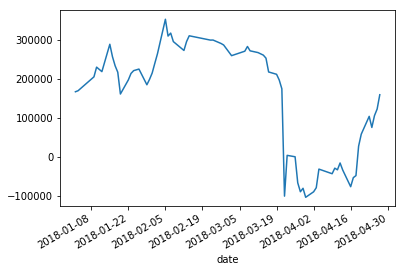

In [30]:
Risk.assets.plot()

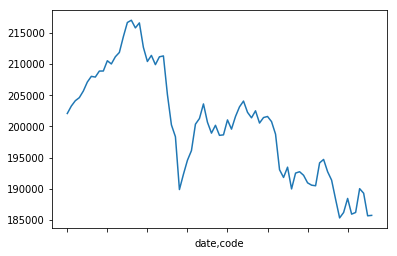

In [31]:
Risk.benchmark_assets.plot()

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

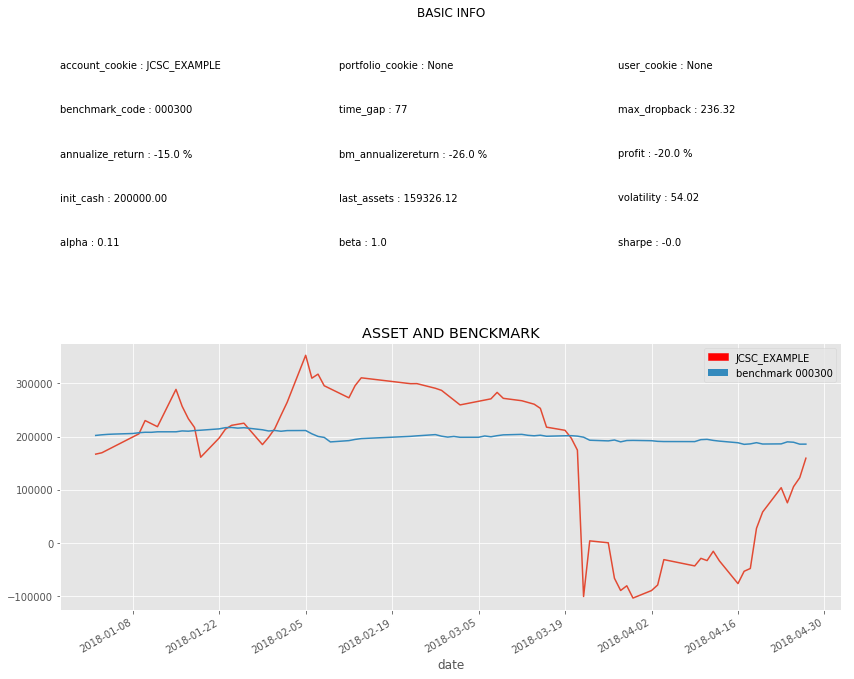

In [32]:
Risk.plot_assets_curve()

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

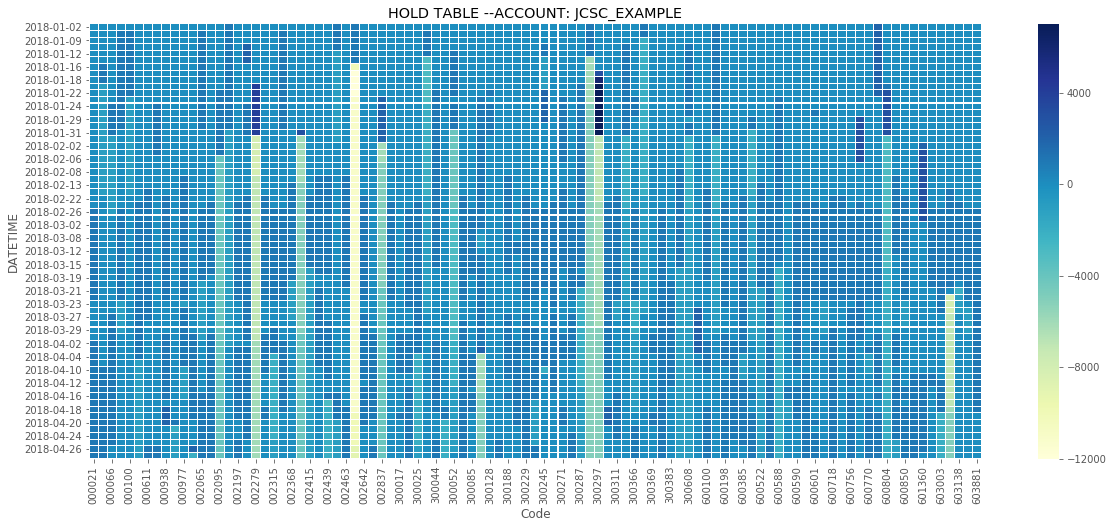

In [33]:
Risk.plot_dailyhold()

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

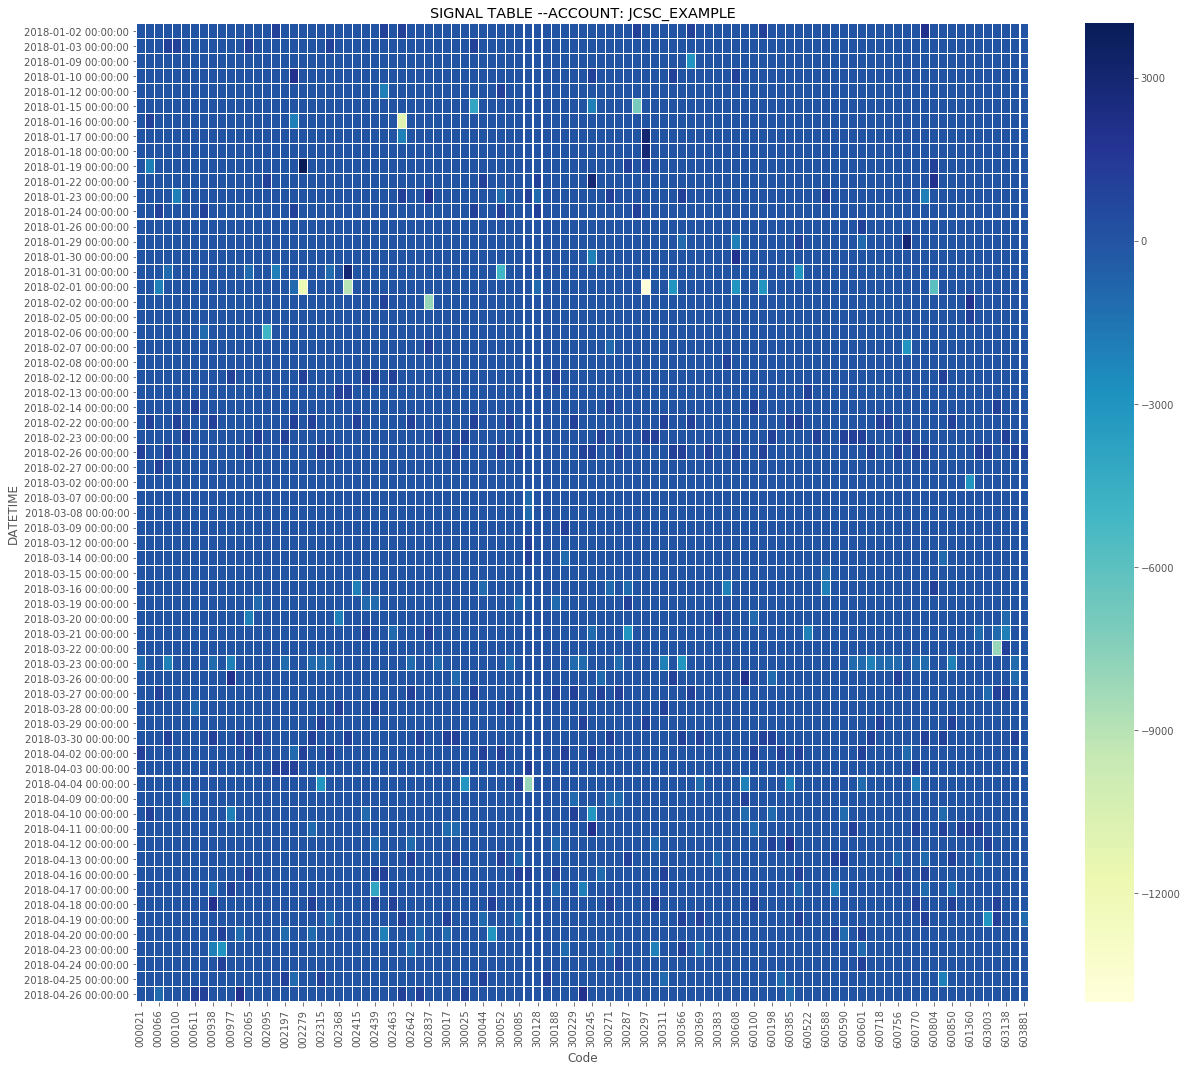

In [34]:
Risk.plot_signal()

In [35]:
Risk.profit_construct

{'total_buyandsell': -38907.76,
 'total_tax': -1513.82,
 'total_commission': -252.3,
 'total_profit': -40673.88}

In [39]:
Performance=QA.QA_Performance(Account)

In [ ]:
Performance.pnl_lifo

In [ ]:
Performance.plot_pnlmoney(Performance.pnl_lifo)

## STEP6: 存储结果

In [ ]:
Account.save()
Risk.save()

## STEP7: 查看存储的结果

In [ ]:
account_info=QA.QA_fetch_account({'account_cookie':'JCSC_EXAMPLE'})

In [ ]:
account=QA.QA_Account().from_message(account_info[0])

In [ ]:
account